In [3]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
wine=load_wine()
wine.data.shape

(178, 13)

In [23]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [24]:
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)

score_clf = clf.score(Xtest,Ytest)
score_rfc = rfc.score(Xtest,Ytest)

print("DecisionTree:{}".format(score_clf)
     ,"RandomeForest:{}".format(score_rfc)
     )

DecisionTree:0.8703703703703703 RandomeForest:0.9629629629629629


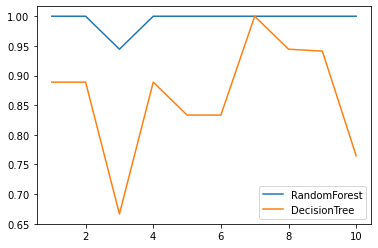

In [31]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label="RandomForest")
plt.plot(range(1,11),clf_s,label="DecisionTree")
plt.legend()
plt.show()


RandomForest:
0.9666666666666666


(None, None)

DecisionTree:
0.8761437908496731


(None, None)

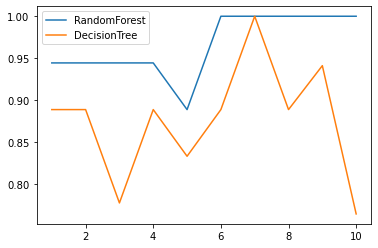

In [33]:
label = "RandomForest"
for model in [RandomForestClassifier(n_estimators=25),DecisionTreeClassifier()]:
    score = cross_val_score(model,wine.data,wine.target,cv=10)
    print("{}:".format(label)),print(score.mean())
    plt.plot(range(1,11),score,label = label)
    plt.legend()
    label = "DecisionTree"

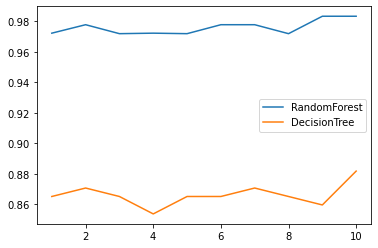

In [34]:
rfc_l = []
clf_l = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)
    
plt.plot(range(1,11),rfc_l,label="RandomForest")
plt.plot(range(1,11),clf_l,label="DecisionTree")
plt.legend()
plt.show()


0.9888888888888889 33


<Figure size 1440x360 with 0 Axes>

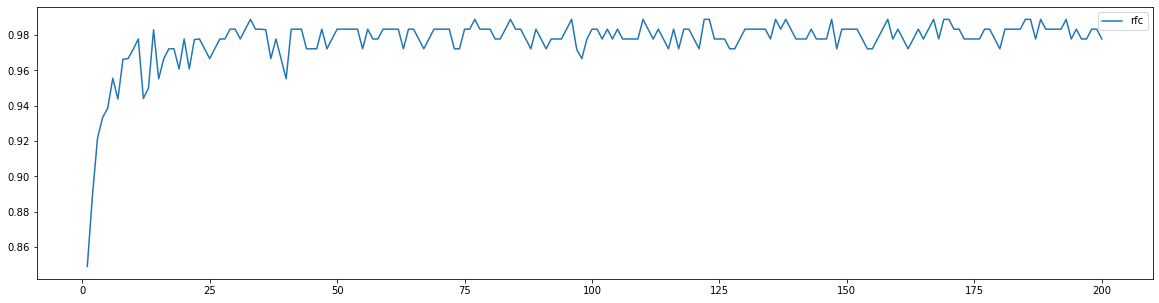

In [36]:
rfc_l = []

for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    
print(max(rfc_l),rfc_l.index(max(rfc_l))+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201),rfc_l,label="rfc")
plt.legend()
plt.show()



In [74]:
rfc = RandomForestClassifier(n_estimators=25,bootstrap=True,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)
rfc.oob_score_

0.9775280898876404

In [75]:
rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1506560309),
 DecisionTreeClassifier(max_features='auto', random_state=1173493336),
 DecisionTreeClassifier(max_features='auto', random_state=1167348502),
 DecisionTreeClassifier(max_features='auto', random_state=277257390),
 DecisionTreeClassifier(max_features='auto', random_state=518526666),
 DecisionTreeClassifier(max_features='auto', random_state=2020520246),
 DecisionTreeClassifier(max_features='auto', random_state=285620180),
 DecisionTreeClassifier(max_features='auto', random_state=1881228718),
 DecisionTreeClassifier(max_features='auto', random_state=1742849485),
 DecisionTreeClassifier(max_features='auto', random_state=424472483),
 DecisionTreeClassifier(max_features='auto', random_state=839255777),
 DecisionTreeClassifier(max_features='auto', random_state=1663245019),
 DecisionTreeClassifier(max_features='auto', random_state=872634522),
 DecisionTreeClassifier(max_features='auto', random_state=2015879605),
 DecisionTre

In [76]:
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain,Ytrain)

In [77]:
rfc.score(Xtest,Ytest)

0.9814814814814815

In [78]:
rfc.apply(Xtest)

array([[ 5,  7,  3, ...,  7,  4, 12],
       [12, 18, 15, ..., 18, 18,  4],
       [ 5,  7,  3, ..., 11,  4,  9],
       ...,
       [12, 16, 15, ..., 18, 17, 18],
       [ 5,  7,  5, ..., 11,  6,  9],
       [ 9, 16,  5, ...,  7,  4,  4]])

In [81]:
rfc.predict(Xtest)

array([1, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 0, 2, 1, 2, 2, 1, 0, 0, 1, 0,
       2, 2, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 2, 0, 1, 2, 2, 0,
       1, 1, 1, 2, 2, 2, 1, 0, 1, 1])

In [83]:
rfc.predict_proba(Xtest)

array([[0.04, 0.96, 0.  ],
       [0.92, 0.04, 0.04],
       [0.04, 0.96, 0.  ],
       [0.04, 0.12, 0.84],
       [0.  , 0.28, 0.72],
       [0.  , 0.96, 0.04],
       [0.24, 0.76, 0.  ],
       [0.32, 0.64, 0.04],
       [0.  , 0.  , 1.  ],
       [0.88, 0.12, 0.  ],
       [0.12, 0.12, 0.76],
       [0.  , 0.88, 0.12],
       [0.88, 0.12, 0.  ],
       [0.08, 0.28, 0.64],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.04, 0.28, 0.68],
       [0.  , 0.88, 0.12],
       [1.  , 0.  , 0.  ],
       [0.92, 0.08, 0.  ],
       [0.12, 0.84, 0.04],
       [0.84, 0.12, 0.04],
       [0.08, 0.  , 0.92],
       [0.04, 0.08, 0.88],
       [0.96, 0.04, 0.  ],
       [0.  , 0.04, 0.96],
       [0.  , 1.  , 0.  ],
       [0.  , 0.96, 0.04],
       [0.  , 0.92, 0.08],
       [0.92, 0.08, 0.  ],
       [0.  , 0.92, 0.08],
       [0.92, 0.04, 0.04],
       [0.92, 0.08, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.08, 0.88, 0.04],
       [0.88, 0.08, 0.04],
 

In [85]:
rfc.feature_importances_

array([0.1586773 , 0.02597699, 0.00700048, 0.03171491, 0.02934587,
       0.06802607, 0.11467218, 0.01482405, 0.03082944, 0.18604829,
       0.05722708, 0.11006937, 0.16558796])

Text(0.5, 0, "individual estimator's error")

Text(0, 0.5, "RandomForest's error")

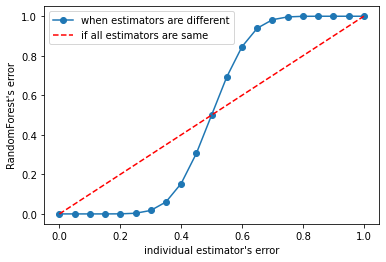

0             0
0   0.00  0.000000e+00
1   0.05  3.591139e-11
2   0.10  1.620834e-07
3   0.15  1.688958e-05
4   0.20  3.690480e-04
5   0.25  3.370448e-03
6   0.30  1.746974e-02
7   0.35  6.044491e-02
8   0.40  1.537678e-01
9   0.45  3.063240e-01
10  0.50  5.000000e-01
11  0.55  6.936760e-01
12  0.60  8.462322e-01
13  0.65  9.395551e-01
14  0.70  9.825303e-01
15  0.75  9.966296e-01
16  0.80  9.996310e-01
17  0.85  9.999831e-01
18  0.90  9.999998e-01
19  0.95  1.000000e+00
20  1.00  1.000000e+00

numpy.float64

In [115]:
from scipy.special import comb
import numpy as np
# np.set_printoptions(precision=2,suppress=False) ##木有用

x = np.linspace(0,1,21)
y = []
for epsilon in np.linspace(0,1,21):
        E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) for i in range(13,26)]).sum().astype("double")
        y.append(E)
#         y.append(format(E,'.2f'))
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()

import pandas as pd
pd.concat([pd.DataFrame(x),pd.DataFrame(y)],axis=1)
type(y[0])

In [116]:

from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [118]:
boston = load_boston()
boston.data

array([[6.32e-03, 1.80e+01, 2.31e+00, ..., 1.53e+01, 3.97e+02, 4.98e+00],
       [2.73e-02, 0.00e+00, 7.07e+00, ..., 1.78e+01, 3.97e+02, 9.14e+00],
       [2.73e-02, 0.00e+00, 7.07e+00, ..., 1.78e+01, 3.93e+02, 4.03e+00],
       ...,
       [6.08e-02, 0.00e+00, 1.19e+01, ..., 2.10e+01, 3.97e+02, 5.64e+00],
       [1.10e-01, 0.00e+00, 1.19e+01, ..., 2.10e+01, 3.93e+02, 6.48e+00],
       [4.74e-02, 0.00e+00, 1.19e+01, ..., 2.10e+01, 3.97e+02, 7.88e+00]])

In [127]:
rfr = RandomForestRegressor(n_estimators=25,random_state=2)
score = cross_val_score(rfr,boston.data,boston.target,cv=10
#                        ,scoring="neg_mean_squared_error"
#                         ,scoring="r2"
                        ,scoring="neg_mean_absolute_error"
                       )
score.mean()

-3.093003294117647

In [124]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']